In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, v_measure_score, adjusted_rand_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from hdbscan import HDBSCAN

import warnings
warnings.filterwarnings('ignore')

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

In [88]:
X = load_digits()

In [89]:
y = X.target
X = X.data

In [90]:
X.shape, y.shape

((1797, 64), (1797,))

**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

In [91]:
x = X.reshape(X.shape[0], 8, 8)
x = 16 - x

In [92]:
x[0].shape

(8, 8)

<Figure size 432x288 with 0 Axes>

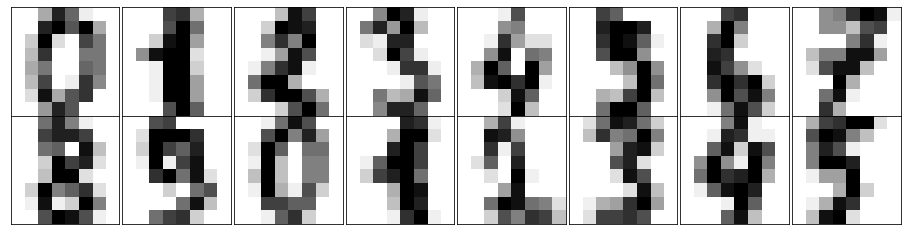

In [93]:
plt.gray()

fig1 = plt.figure(figsize=(16, 4), constrained_layout=False)
outer_grid = fig1.add_gridspec(2, 8, wspace=0, hspace=0)

axs = outer_grid.subplots()  
for (c, d), ax in np.ndenumerate(axs):
    ax.imshow(x[8*c+d], interpolation = None)
    ax.set(xticks=[], yticks=[])

plt.show()

# 2. Кластеризация и оценка качества

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

In [203]:
X_ = X.copy()

In [245]:
Km = KMeans(n_clusters = 10, n_init = 10)
Ac = AgglomerativeClustering(n_clusters = 10)

In [246]:
y_km = Km.fit_predict(X_)
y_ac = Ac.fit_predict(X_)

In [247]:
y_km.shape, y_ac.shape

((1797,), (1797,))

**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

In [99]:
def plot_mean_cluster(x, y, drop_negative = False):
    centers = np.array([np.mean(x[y == cluster], axis = 0) for cluster in np.unique(y)])
    
    if drop_negative:
        centers = centers[np.unique(y) >= 0]

    plt.gray()
    fig2 = plt.figure(figsize=(8, 4), constrained_layout=False)
    outer_grid = fig2.add_gridspec(2, 5, wspace=0, hspace=0)
    axs = outer_grid.subplots()  

    for (c, d), ax in np.ndenumerate(axs):
        ax.imshow(centers[5*c+d], interpolation = None)
        ax.set(xticks=[], yticks=[])
    plt.show()

<Figure size 432x288 with 0 Axes>

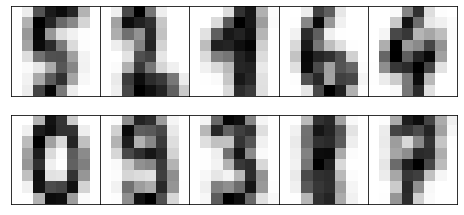

In [249]:
plot_mean_cluster(x, y_km)

<Figure size 432x288 with 0 Axes>

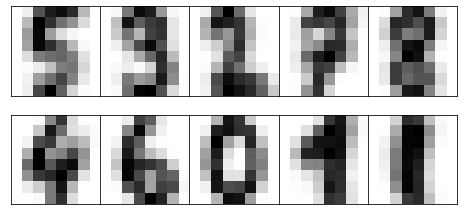

In [250]:
plot_mean_cluster(x, y_ac)

Любой хоть сколько-нибудь имеющий вкус человек без лишней смуты заметит совершенство первой реализации. Я нахожу её приятной, комфортной человеческому глазу. K-Means смог достичь элегантной девятки, прекрасной стройной четвёрки, чьи грани поражают нас своими явными очертаниями. Восьмёрка в K-means стала заметнее, авторитетнее, на её концах как бы появился вес, масса, она стала похожа на гантелю. А гантели есть вещь увесистая и угрюмо полезная: спортивного порядка вещь. Мало кто в нашей жизни будет спорить со спортсменами, да и к лету надобно приводить себя в форму, поэтому я без лишних размышлений отдаю своё предпочтение классическим K-средним с её гантелевидными восьмёрками и элегантными девятками.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

In [225]:
ac_scores = []
km_scores = []
for k in range(2, 21):
    Km = KMeans(n_clusters = k, n_init = 10)
    Ac = AgglomerativeClustering(n_clusters = k)
    y_km = Km.fit_predict(X_)
    y_ac = Ac.fit_predict(X_)
    km_scores.append(silhouette_score(X_, y_km))
    ac_scores.append(silhouette_score(X_, y_ac))

<AxesSubplot:>

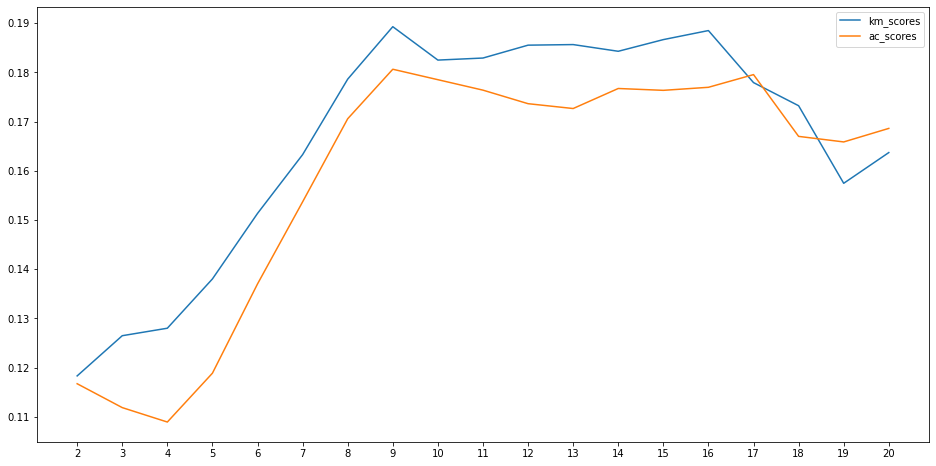

In [239]:
plt.figure(figsize = (16, 8))
plt.xticks(np.arange(2, 21, 1))
sns.lineplot([i for i in range(2, 21)], km_scores, label='km_scores')
sns.lineplot([i for i in range(2, 21)], ac_scores, label='ac_scores')

При 9 кластерах достигается максимум силуэта. Практически в соответствии с нашими ожиданиями. Отклонение легко объяснить тем, что структура (в векторном пространстве, которое оценивает силуэт) некоторых цифр крайне похожа на структуру других (9, 8 и 3, 1 и 7).

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [252]:
ac_scores = []
km_scores = []
for k in range(2, 21):
    Km = KMeans(n_clusters = k, n_init = 10)
    Ac = AgglomerativeClustering(n_clusters = k)
    y_km = Km.fit_predict(X_)
    y_ac = Ac.fit_predict(X_)
    km_scores.append(v_measure_score(y, y_km))
    ac_scores.append(v_measure_score(y, y_ac))

<AxesSubplot:>

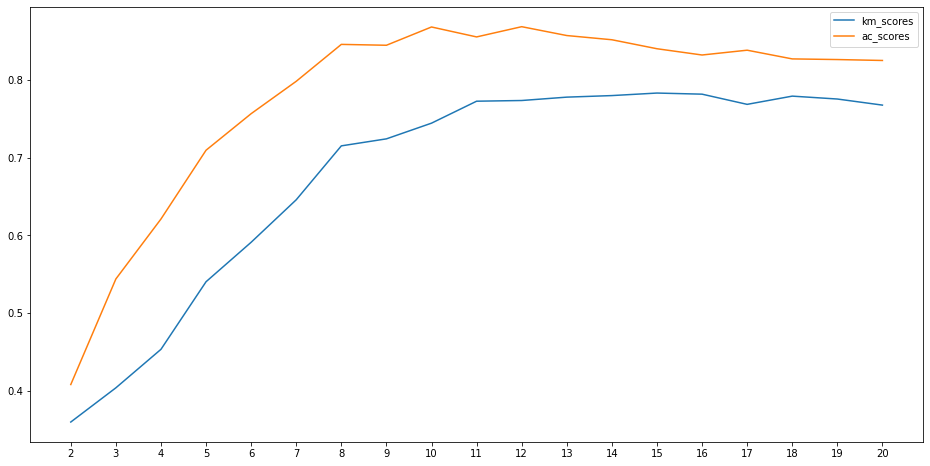

In [253]:
plt.figure(figsize = (16, 8))
plt.xticks(np.arange(2, 21, 1))
sns.lineplot([i for i in range(2, 21)], km_scores, label='km_scores', )
sns.lineplot([i for i in range(2, 21)], ac_scores, label='ac_scores')

При 10-11 кластерах достигается максимум V-меры. Практически в соответствии с нашими ожиданиями.
Смутить может медленное увеличение V-score в иерархической кластеризации.

Поскольку V-мера является гармоническим средним между однородностью и полнотой, можно заключить, что увеличение количества кластеров стремительно увеличивает однородность, не так быстро снижая полноту.

# 3. Снижение размерности признакового пространства

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [268]:
Km = KMeans(n_clusters = 10, n_init = 10)
Ac = AgglomerativeClustering(n_clusters = 10)

In [269]:
ac_sil_scores = []
km_sil_scores = []
ac_V_scores = []
km_V_scores = []
rng = [2,5,10,20]

for n in rng:
    Tsvd = TruncatedSVD(n_components = n)
    Xreduced = Tsvd.fit_transform(X_)
    
    y_km = Km.fit_predict(Xreduced)
    y_ac = Ac.fit_predict(Xreduced)
    
    km_sil_scores.append(silhouette_score(X_, y_km))
    ac_sil_scores.append(silhouette_score(X_, y_ac))
    
    km_V_scores.append(v_measure_score(y, y_km))
    ac_V_scores.append(v_measure_score(y, y_ac))

<AxesSubplot:>

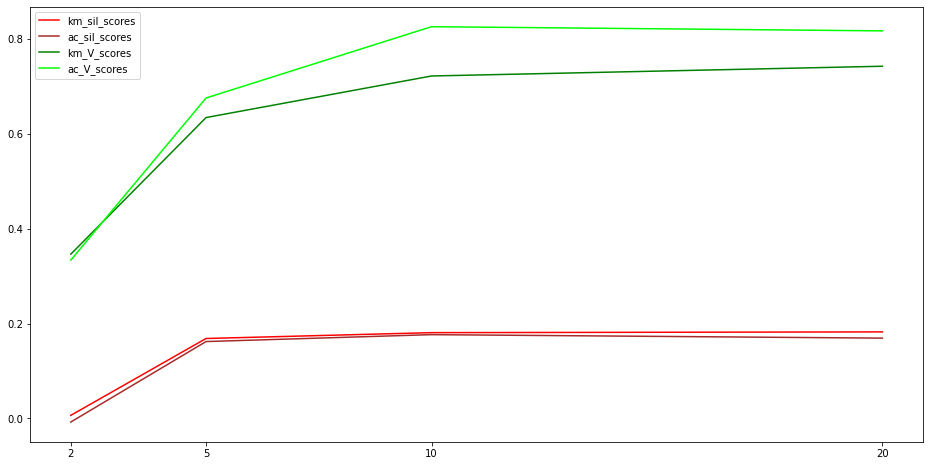

In [270]:
plt.figure(figsize = (16, 8))
plt.xticks(rng)
sns.lineplot([i for i in rng], km_sil_scores, label='km_sil_scores', color = 'red')
sns.lineplot([i for i in rng], ac_sil_scores, label='ac_sil_scores', color = 'brown')
sns.lineplot([i for i in rng], km_V_scores, label='km_V_scores', color = 'green')
sns.lineplot([i for i in rng], ac_V_scores, label='ac_V_scores', color = 'lime')

Существенного увеличения качества в сравнении с оригинальными данными замечено не было.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

In [282]:
tsn = TSNE()
X_reduced = tsn.fit_transform(X_)

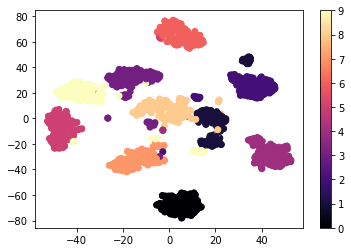

In [283]:
plt.scatter(X_reduced[:,0],X_reduced[:,1], c = y, cmap= 'magma')
cb = plt.colorbar()
cb.set_ticklabels(y)

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [288]:
y_km = Km.fit_predict(X_reduced)
y_ac = Ac.fit_predict(X_reduced)
    
print('silhouette_score on KM:', silhouette_score(X_, y_km))
print('silhouette_score on AC:', silhouette_score(X_, y_ac))

print('v_measure_score on AC:', v_measure_score(y, y_km))
print('v_measure_score on AC:', v_measure_score(y, y_ac))

silhouette_score on KM: 0.16363471112785255
silhouette_score on AC: 0.17019675477479712
v_measure_score on AC: 0.9040764356528336
v_measure_score on AC: 0.8695297917852394


Во-первых, отметим, что проверять метрику силуэта с учетом меток, предсказанных на редуцированных признаках, не совсем корректно как на редуцированных данных, так и на изначальных. Поэтому факт того, что силуэт показал лучший результат на изначальных предсказаниях не информативнй. 
Гораздо более релевантна в нашем случае метрика, не привязанная к размерностям данных - а именно V-score. t-SNE алгоритм смог повысить эту оценку.

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

<Figure size 432x288 with 0 Axes>

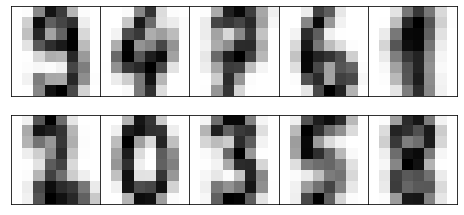

In [287]:
plot_mean_cluster(x, y_km)

Вне всяких сомнений, удалось. Великолепная восьмёрка с чудными очертаниями, хорошо описанная семёрка, будто бы коса.
Мне все очень нравится.

# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы.

Таким образом, были рассмотрены 2 основных метода кластеризации - иерархический метод и метод k-средних. Применительно к нашей задаче метод k-средних показал себя лучшим по совокупности оценок V-меры и Силуэта.

Что касается уменьшения размерности признакового пространства - были опробованы методы сингулярного разложения и знаменитый t-SNE. Второй помог добиться значительного прироста в V-мере и улучшить качество кластеризации, что заметно не только метрически, но и на более явных и отчётливых цифрах при выводе "центров" каждого из кластеров.

Фактически t-SNE использует аппроксимацию t-распределением стьюдента относительного вероятностного распределения гауссиана в рамках графа исходных данных. В результате, ввиду самой концепции вероятностного подхода, мы получаем нелинейную проекцию на пространство меньшей размерности, что способствует гораздо эффективнее соблюдать расстояния между экземплярами. Сама форма распределения стьюдента (она более тяжелая на периферии) при этом помогает в определенной степени "разбросать" наши данные. 

**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.

In [96]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [97]:
x = X.values.reshape(X.shape[0], 28, 28)
x = 16 - x

<Figure size 432x288 with 0 Axes>

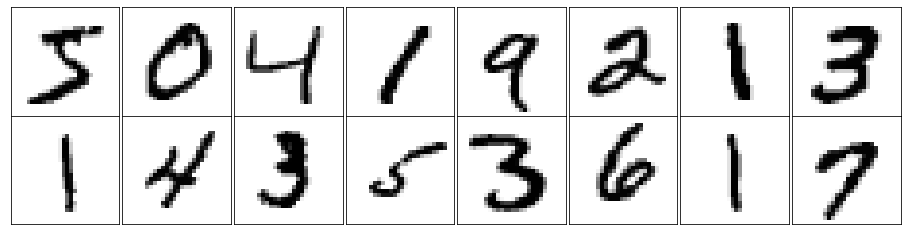

In [4]:
plt.gray()

fig1 = plt.figure(figsize=(16, 4), constrained_layout=False)
outer_grid = fig1.add_gridspec(2, 8, wspace=0, hspace=0)

axs = outer_grid.subplots()  
for (c, d), ax in np.ndenumerate(axs):
    ax.imshow(x[8*c+d], interpolation = None)
    ax.set(xticks=[], yticks=[])

plt.show()

In [5]:
from umap import UMAP

In [13]:
def map_of_digits(X, y):
    cmap = plt.cm.get_cmap('tab10', 10)
    fig1 = plt.figure(figsize=(14, 10), constrained_layout=False)
    plt.scatter(X[:,0],X[:,1], s=0.1, c = y.astype(int).values, cmap= cmap)
    cb = plt.colorbar()

In [11]:
um = UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2)
X_red_umap = um.fit_transform(X)

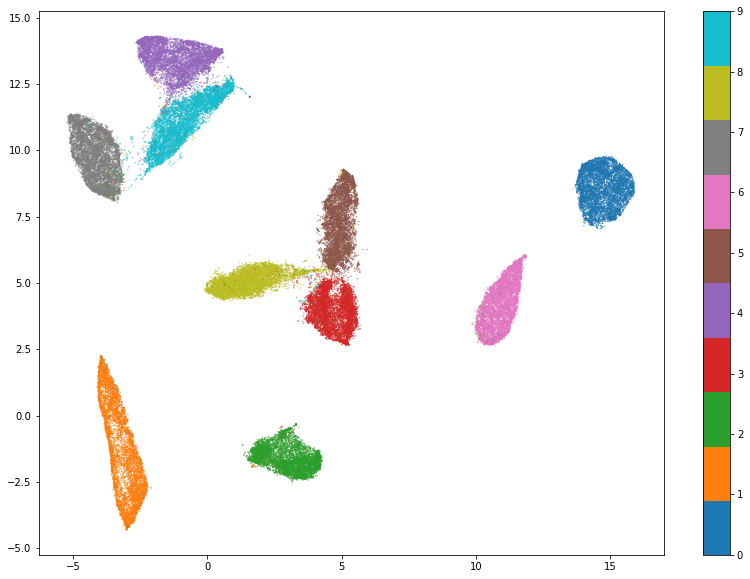

In [14]:
map_of_digits(X_red_umap, y)

In [366]:
tsn = TSNE()
X_red_tsn = tsn.fit_transform(X)

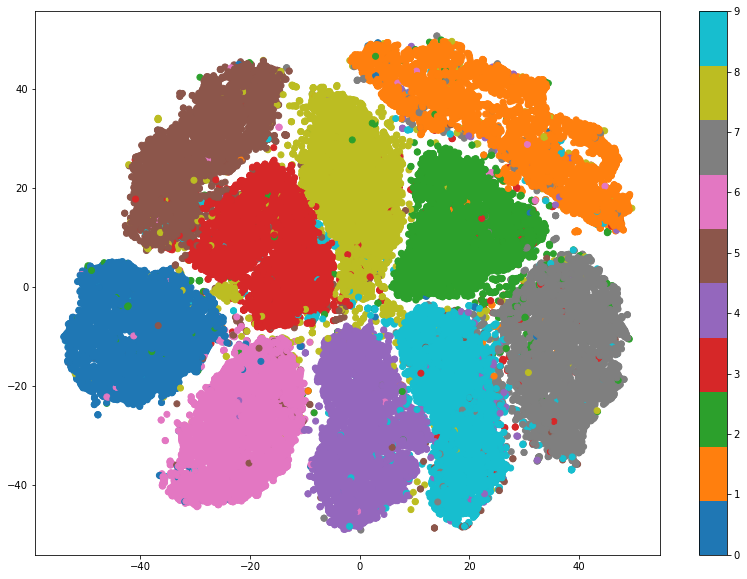

In [367]:
map_of_digits(X_red_tsn, y)

In [ ]:
# we will clasterize based on data that is reducted by UMAP

In [18]:
Km = KMeans(n_clusters = 10, n_init = 20)
y_km = Km.fit_predict(X_red_umap)

In [19]:
v_measure_score(y, y_km)

0.8461081603606604

In [31]:
adjusted_rand_score(y[clustered], y_km[clustered])

0.7796287478201488

<Figure size 432x288 with 0 Axes>

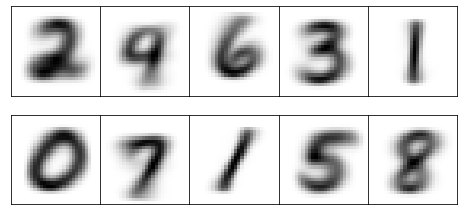

In [75]:
#KMeans clustering illustration
plot_mean_cluster(x, y_km)

In [ ]:
#lets try much more complicated algorithm for clustering - HDBSCAN

In [20]:
y_hdb = HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(X_red_umap)

In [21]:
v_measure_score(y, y_hdb)

0.9072922782458434

In [26]:
clustered = (y_hdb >= 0)
adjusted_rand_score(y[clustered], y_hdb[clustered])

0.9346490456676256

<Figure size 432x288 with 0 Axes>

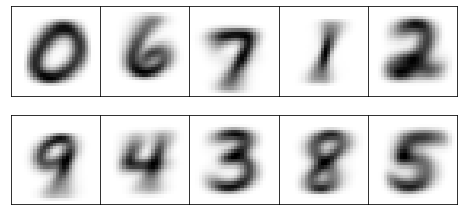

In [101]:
#HDBSCAN clustering illustration
plot_mean_cluster(x, y_hdb, drop_negative = True)

Таким образом, была выбрана кластеризация HDBSCAN на данных, редуцированных нелинейным алгоритмом UMAP. Мы не использовали силуэт, потому что это крайне слабая и затратная метрика для оценки такого рода данных.
Кластеризация показала высокий результат V-меры: 0.907, а также приличные результаты исправленного индекса Ренда - 0.93.
прелесть. 